In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv'
salary = pd.read_csv(url)
salary = salary.dropna()
salary

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
inputs = salary.drop(['Survived', 'Ticket', 'Name','PassengerId','Cabin', 'SibSp', 'Parch', 'Embarked'],axis = 'columns')
target = salary.filter(['Survived'])
inputs.head()

,Pclass,Sex,Age,Fare
1,1,female,38.0,71.2833
3,1,female,35.0,53.1000
6,1,male,54.0,51.8625
10,3,female,4.0,16.7000
11,1,female,58.0,26.5500


In [ ]:
label_Class = LabelEncoder()
label_sex = LabelEncoder()
#label_embarked = LabelEncoder()

In [ ]:
inputs['Pclass_n'] = label_Class.fit_transform(inputs['Pclass'])
inputs['Sex_n'] = label_sex.fit_transform(inputs['Sex'])
#inputs['Embarked_n'] = label_embarked.fit_transform(inputs['Embarked'])
#inputs_n = inputs.drop(['Pclass','Sex','Embarked'], axis = 'columns')
inputs_n = inputs.drop(['Pclass','Sex'], axis = 'columns')
inputs_n.tail()

,Age,Fare,Pclass_n,Sex_n
871,47.0,52.5542,0,0
872,33.0,5.0000,0,1
879,56.0,83.1583,0,0
887,19.0,30.0000,0,0
889,26.0,30.0000,0,1


Training the Model with Entropy

In [ ]:
#model = tree.DecisionTreeClassifier(criterion = 'entropy')
#score_ent = []
#for i in range(50):
#  target_train, target_test, inputs_train, inputs_test=train_test_split(target,inputs_n,test_size=0.2)
#  model.fit(inputs_train, target_train)
#  score_ent.append(model.score(inputs_test, target_test))
#print(np.array(score_ent).mean(),np.array(score_ent).std())

0.7702702702702703 0.06885264433976754


Training the Model with Gini

In [ ]:
model = tree.DecisionTreeClassifier(max_depth = 6, criterion = 'gini')
score_gini = []
for i in range(50):
  target_train, target_test, inputs_train, inputs_test=train_test_split(target,inputs_n,test_size=0.2)
  model.fit(inputs_train, target_train)
  score_gini.append(model.score(inputs_test, target_test))
print(np.array(score_gini).mean(),np.array(score_gini).std())

0.7567567567567568 0.07567567567567568


Viewing Model

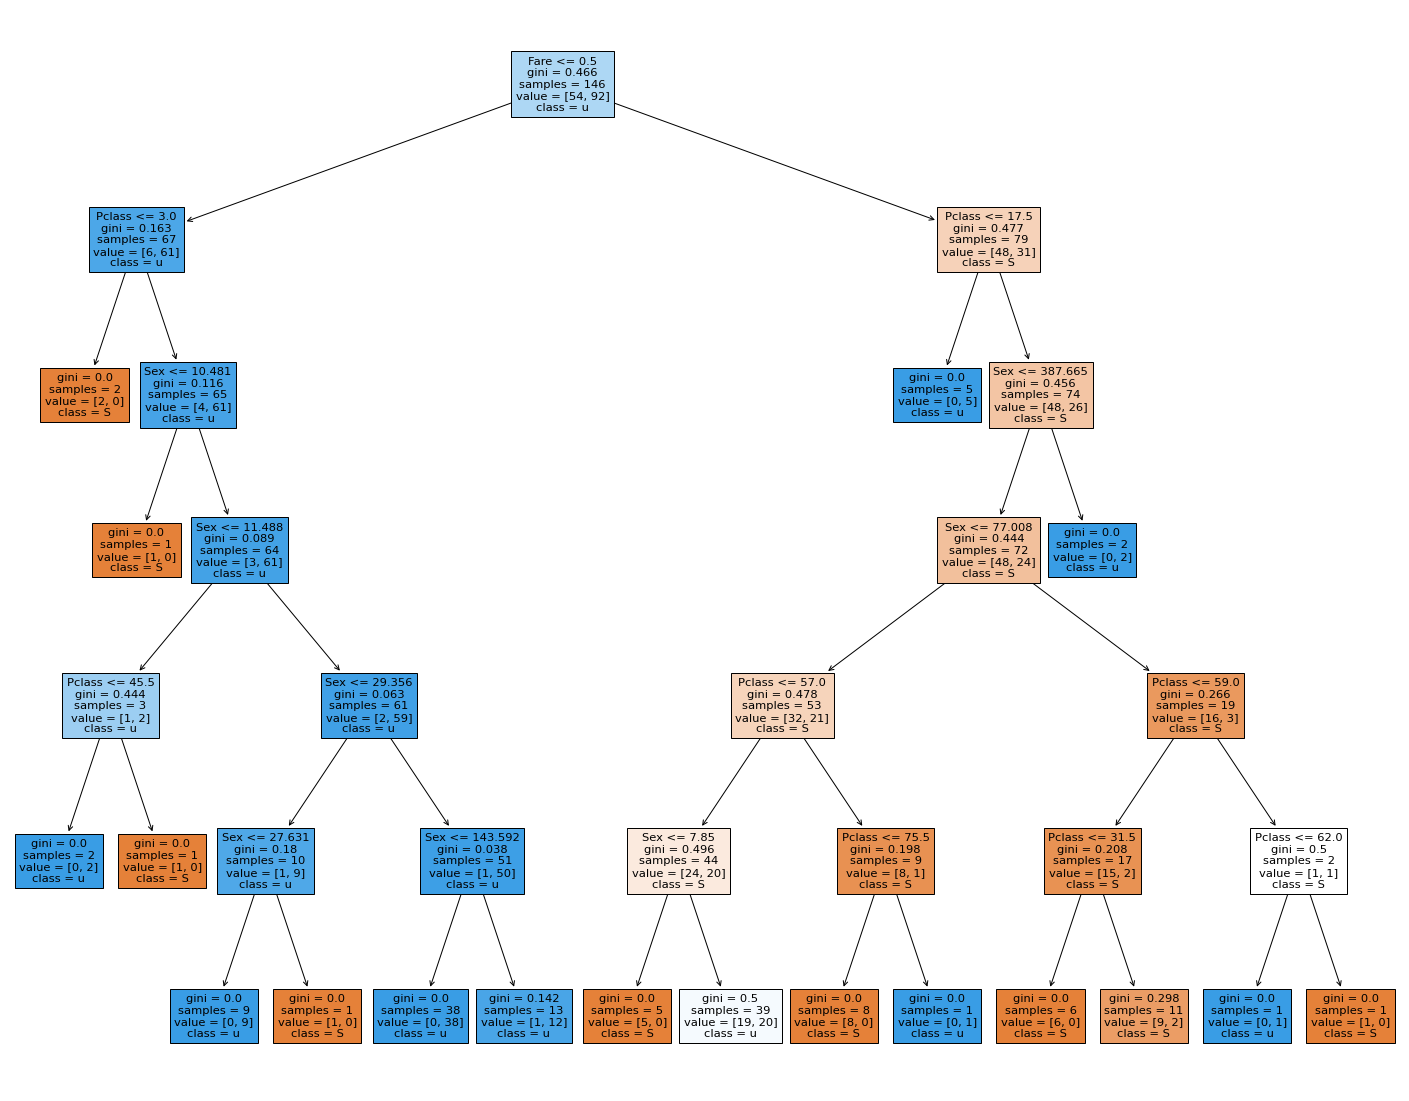

In [ ]:
column_headers = list(inputs.columns.values)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names = column_headers,
                   class_names = 'Survived',
                   filled = True)